1) Successfully executing the code and changing 4 hyperparameters in the model.

2) Validating the model on 5 new images (that are not present in the data set and are not used in training or testing but are taken form internet).

3) Providing the logical explanation of the changes that you made to hyper parameters and over all code quality.

Answer to question 3:

---The batch size was changed from 64 to 32 for one the analysis. One major 
advantage of changing to a smaller batch size would be if you do not have enough memory so you can scale down, therefore will use less memory. The biggest disadvantage to a smaller batch size is less accurate the estimate of the gradient will be.

---The epochs size was changed as well to see how it would affect the accuracy. I kept it a small number because I wanted to finish the execution in a reasonable time and see how it would affect the accuracy. Overall, from my observation the accuracy tends to improve when the number of epochs is greater. But finding that sweet spot is the general idea where it does not bring down the accuracy but improves the overall prediction. For a large dataset like this you would want a high number of epochs to get the best accuracy as possible. If the dataset is small running on few or less than 10 epochs should suffice.

---The optimizer can be modified to reduce the losses. For this algorithm 'adam' and 'adamax were compared. In general, 'adam' is used to obtain the best results, and after comparing the two it was the case.

---One thing to consider before performing any algorithm is how much overfitting will be present? This can be tested by changing the dropout and it varies on the dataset. But in general tweaking up or down can give you positive or negative results. For my case I increased it to 0.3, and it showed improvement in my accuracy.






Importing the required libaraies and packages. 

In [ ]:
!pip install -q tf-nightly
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
#from tensorflow.keras.models import Sequential
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils
from keras.datasets import cifar10

     |████████████████████████████████| 391.1MB 41kB/s 
     |████████████████████████████████| 471kB 46.3MB/s 
     |████████████████████████████████| 10.2MB 41.1MB/s 


Setting random see for reproducibity

In [ ]:
seed = 25

Loading the dataset. Which can be done by using load_data()function

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


Looking at the shape of the data for all the previous varibales declared when the data was loaded 

In [ ]:
print("The X_shape of the data: ", "size:", " M X M: ", "RBG Value:", '\n')

print("        x_train shape: ",X_train.shape, '\n')
print("        x_test shape: ",X_test.shape, '\n')

print("The X_shape of the data: ", "size:", "label:", '\n')

print("        x_train shape: ",y_train.shape, '\n')
print("        x_test shape: ",y_test.shape, '\n')


The X_shape of the data:  size:  M X M:  RBG Value: 

        x_train shape:  (50000, 32, 32, 3) 

        x_test shape:  (10000, 32, 32, 3) 

The X_shape of the data:  size: label: 

        x_train shape:  (50000, 1) 

        x_test shape:  (10000, 1) 



printing each label. It represetns each class. 

In [ ]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


looking at the image at a random location

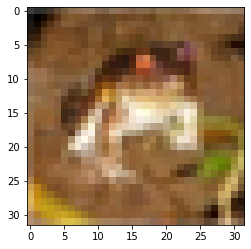

In [ ]:
plt.imshow(X_train[0])

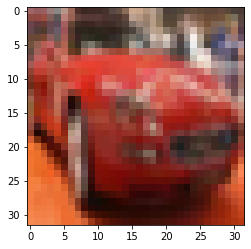

In [ ]:
plt.imshow(X_train[5])

In [ ]:
#num_classes = 10
#cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   #"dog", "frog", "horse", "ship", "truck"]

Normazling the data.


The input values are between 0 and 255. 

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0 # dividing by 255
X_test /= 2550

Converts a class vector (integers) to binary class matrix.
This will be done for y_train and y_test.
Return a binrary represenation of the input



In [ ]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [1]:
print("y_train",'\n')
print(y_train[0:5], '\n')
print("----------------------------------------------------------")
print("y_test", '\n')
print(y_test[0:5], '\n')

y_train 



NameError: ignored

specifying the number of classes present in the dataset. The purpose of doing this allows us know the number of neuorns will be compressed in the final layer

In [ ]:
class_num = y_test.shape[1]

Building the model(Blue print)


The convolutional layer simply put takes in a image which is the input and assigns the importance like weights and biases to various regions of the image. This allows the it to differentiate them.  

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same'))

The rectified linear activation function or ReLU for short is a piecewise linear function that will output the input directly if it is positive, otherwise, it will output zero. It has become the default activation function for many types of neural networks because a model that uses it is easier to train and often achieves better performanc

In [ ]:
model.add(Activation('relu'))

Next, the dropout layer is added. The reason for adding this is to prevent neural networks from overfitting. Another reason for adding the dropout layer is to reduce the capacity or thinning the network during training. Another thing to note is by adding the dropout layer more nodes maybe needed when it is utilized. 

Purpose of adding BatNormaliztaion is to standardize the inputs, meaning it will have mean of zero and standard deviation of 1

In [ ]:
model.add(Dropout(0.2)) #adding 20% dropout
model.add(BatchNormalization()) #used to strandarize the input
model.add(Conv2D(64, (3, 3), padding = 'same'))#2D convolution layer
model.add(Activation('relu'))

The pooling layer is added after the convolutional layer (ReLU).
It is just a new layer that is added.

In [ ]:
model.add(MaxPooling2D(pool_size=(2,2))) #takes in 2x2 pooling window
model.add(Dropout(0.2))
model.add(BatchNormalization())

Adding another pooling layer. total of 2 more layers added and reason for this is because the images are small. 


In [ ]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

Flatteing the layer
This will convert the pooled features map into a single column which is passed to the connected layer that is fully completed. 

In [ ]:
model.add(Flatten())
model.add(Dropout(0.2))

The Dense layer is imported. Few things need to be addresed before doing so. First, the number of neorun in the dense layer, and remembring that the dense layer decreases and will approach the same number of neurons as there are classes in the dataset. For this case there are 10.

In [ ]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


Repeating the code now decresing the units from 256 to 128. Factor of 2

In [ ]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())


In the final stages of the layer the number of classes are passed for the number of neurons. 
class_num will be passed whice was declared in line 12 of code. 
For the activation 'softmax is used becuase it will select the neuorn that have the highest probablilty as its ouput. 



In [ ]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

The number of epocs are trained and the optiizer that will be used. 
Epoch is an dataset that is passed in its entirly forward and backwrds through the nerual networks at once.
Epoch is generally the what we want to train the CNN

In [ ]:

epochs = 2


Finally, compiling the data and see the results.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)       

In [ ]:
numpy.random.seed(seed)
data_history11 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 412s 525ms/step - loss: 1.8381 - accuracy: 0.3701 - val_loss: 3.1647 - val_accuracy: 0.1256
Epoch 2/30
782/782 [==============================] - 412s 526ms/step - loss: 1.1162 - accuracy: 0.5992 - val_loss: 3.6080 - val_accuracy: 0.1298
Epoch 3/30
782/782 [==============================] - 408s 522ms/step - loss: 0.8809 - accuracy: 0.6882 - val_loss: 4.0677 - val_accuracy: 0.1409
Epoch 4/30
782/782 [==============================] - 410s 524ms/step - loss: 0.7557 - accuracy: 0.7333 - val_loss: 3.2792 - val_accuracy: 0.1225
Epoch 5/30
782/782 [==============================] - 407s 521ms/step - loss: 0.6870 - accuracy: 0.7579 - val_loss: 4.2770 - val_accuracy: 0.1026
Epoch 6/30
782/782 [==============================] - 407s 521ms/step - loss: 0.6424 - accuracy: 0.7743 - val_loss: 4.1837 - val_accuracy: 0.1038
Epoch 7/30
782/782 [==============================] - 407s 520ms/step - loss: 0.6154 - accuracy: 0.7847 - val_loss: 5.4608 -

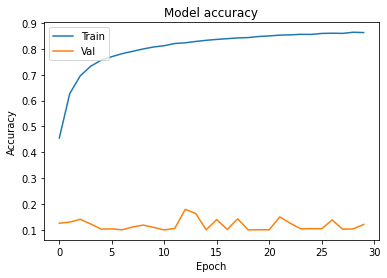

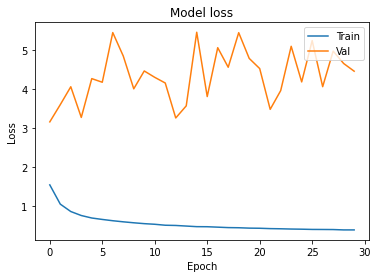

In [ ]:
plt.plot(data_history11.history['accuracy'])
plt.plot(data_history11.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(data_history11.history['loss'])
plt.plot(data_history11.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
scores11 = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores11[1]*100))

Accuracy: 12.09%


Now validating the results with random images 


In [ ]:
#Load the data
from google.colab import files 
uploaded = files.upload() 
new_image = plt.imread("/content/car-49278_1920.jpg") 

Saving car-49278_1920.jpg to car-49278_1920.jpg


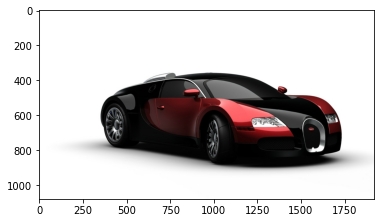

In [ ]:
img = plt.imshow(new_image)

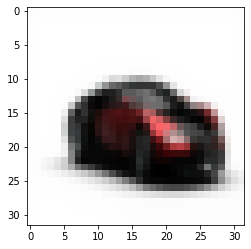

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
predictions = model.predict(np.array( [resized_image] ))

In [ ]:
predictions

array([[1.0230566e-02, 7.7509576e-01, 4.0212185e-03, 1.7838222e-01,
        1.8251414e-04, 7.1143741e-03, 7.5949458e-03, 2.6186512e-04,
        1.2788793e-02, 4.3276763e-03]], dtype=float32)

In [ ]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#printing highest probability to lowest
print(list_index)

[1, 3, 8, 0, 6, 5, 9, 2, 7, 4]


In [ ]:
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

automobile : 77.51 %
cat : 17.84 %
ship : 1.28 %
airplane : 1.02 %
frog : 0.76 %


image 2

In [ ]:
#Load the data
from google.colab import files 
uploaded = files.upload() 
new_image = plt.imread("/content/car-5548242_1920.jpg") #Read in the image 

Saving car-5548242_1920.jpg to car-5548242_1920.jpg


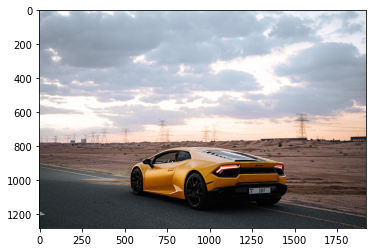

In [ ]:
img = plt.imshow(new_image)

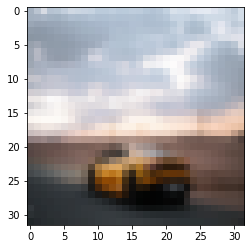

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)



In [ ]:
predictions = model.predict(np.array( [resized_image] ))
predictions

array([[2.1332918e-01, 2.7268991e-02, 6.1268936e-04, 9.6222095e-05,
        1.3771025e-04, 6.0589850e-06, 4.2500244e-05, 1.5197129e-05,
        6.9925004e-01, 5.9241354e-02]], dtype=float32)

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#printing highest probability to lowest
print(list_index)

[8, 0, 9, 1, 2, 4, 3, 6, 7, 5]


In [ ]:
i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

ship : 69.93 %
airplane : 21.33 %
truck : 5.92 %
automobile : 2.73 %
bird : 0.06 %


image 3

Saving cuba-1197800_1920.jpg to cuba-1197800_1920.jpg


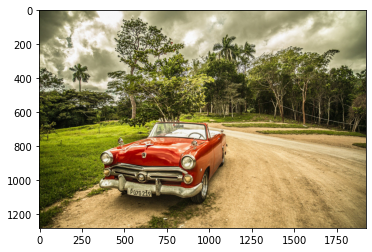

In [ ]:
#Load the data
from google.colab import files 
uploaded = files.upload() 
new_image = plt.imread("/content/cuba-1197800_1920.jpg") #Read in the image 

img = plt.imshow(new_image)



array([[1.3416114e-04, 1.3246661e-02, 1.0425618e-02, 1.5270984e-03,
        9.4200277e-01, 1.5187241e-03, 8.1295198e-05, 3.5432293e-03,
        2.6010284e-03, 2.4919322e-02]], dtype=float32)

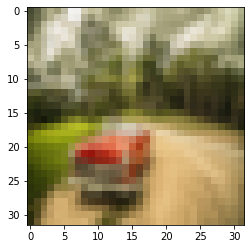

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

predictions = model.predict(np.array( [resized_image] ))
predictions



In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#printing highest probability to lowest
print(list_index)

i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

[4, 9, 1, 2, 7, 8, 3, 5, 0, 6]
deer : 94.2 %
truck : 2.49 %
automobile : 1.32 %
bird : 1.04 %
horse : 0.35 %


image 4

Saving fiat-4322521_1920.jpg to fiat-4322521_1920.jpg


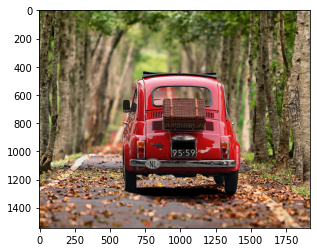

In [ ]:
#Load the data
from google.colab import files 
uploaded = files.upload() 
new_image = plt.imread("/content/fiat-4322521_1920.jpg") #Read in the image 

img = plt.imshow(new_image)

array([[1.0125967e-04, 6.4570587e-03, 5.8513653e-04, 1.8047021e-03,
        1.0990113e-03, 2.4159544e-04, 7.3753879e-05, 3.6307792e-05,
        4.9243611e-03, 9.8467690e-01]], dtype=float32)

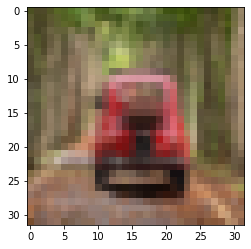

In [ ]:
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

predictions = model.predict(np.array( [resized_image] ))
predictions

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#printing highest probability to lowest
print(list_index)

i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

[9, 1, 8, 3, 4, 2, 5, 0, 6, 7]
truck : 98.47 %
automobile : 0.65 %
ship : 0.49 %
cat : 0.18 %
deer : 0.11 %


image 5

Saving ford-498244_1920.jpg to ford-498244_1920.jpg


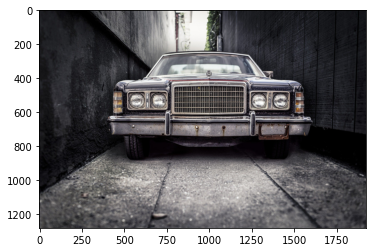

In [ ]:
#Load the data
from google.colab import files 
uploaded = files.upload() 
new_image = plt.imread("/content/ford-498244_1920.jpg") #Read in the image 

img = plt.imshow(new_image)

array([[1.2390652e-03, 1.7010628e-01, 6.8462832e-04, 8.4482197e-04,
        4.1197411e-05, 7.4195523e-05, 7.6745840e-04, 8.3668010e-06,
        6.3244629e-01, 1.9378777e-01]], dtype=float32)

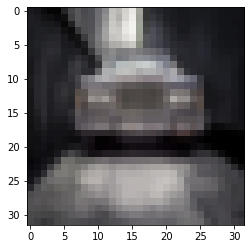

In [ ]:

from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

predictions = model.predict(np.array( [resized_image] ))
predictions

In [ ]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#printing highest probability to lowest
print(list_index)

i=0
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

[8, 9, 1, 0, 3, 6, 2, 5, 4, 7]
ship : 63.24 %
truck : 19.38 %
automobile : 17.01 %
airplane : 0.12 %
cat : 0.08 %


4 hyper-parameters that were changed 

In [ ]:
numpy.random.seed(seed)
data_history00 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)


Epoch 1/5
782/782 [==============================] - 407s 520ms/step - loss: 0.3779 - accuracy: 0.8672 - val_loss: 3.5048 - val_accuracy: 0.1560
Epoch 2/5
782/782 [==============================] - 408s 522ms/step - loss: 0.3819 - accuracy: 0.8664 - val_loss: 3.8857 - val_accuracy: 0.1186
Epoch 3/5
782/782 [==============================] - 410s 525ms/step - loss: 0.3806 - accuracy: 0.8653 - val_loss: 4.4291 - val_accuracy: 0.1159
Epoch 4/5
782/782 [==============================] - 409s 523ms/step - loss: 0.3705 - accuracy: 0.8700 - val_loss: 5.8343 - val_accuracy: 0.1028
Epoch 5/5
782/782 [==============================] - 407s 520ms/step - loss: 0.3691 - accuracy: 0.8683 - val_loss: 5.5998 - val_accuracy: 0.1056


In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

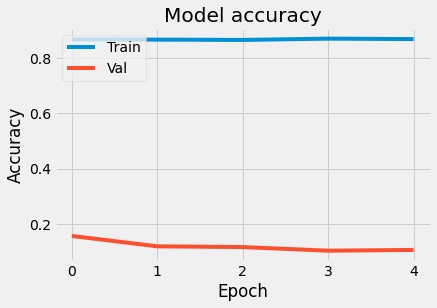

In [ ]:
plt.plot(data_history00.history['accuracy'])
plt.plot(data_history00.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

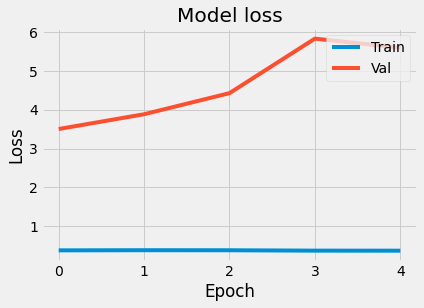

In [ ]:
plt.plot(data_history00.history['loss'])
plt.plot(data_history00.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# Model evaluation
scores2 = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores2[1]*100))

Accuracy: 10.56%


changing batch size to 32

In [ ]:
numpy.random.seed(seed)
data_history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1563/1563 [==============================] - 436s 278ms/step - loss: 1.8076 - accuracy: 0.3782 - val_loss: 3.3861 - val_accuracy: 0.1246
Epoch 2/5
1563/1563 [==============================] - 433s 277ms/step - loss: 1.0773 - accuracy: 0.6168 - val_loss: 4.2866 - val_accuracy: 0.1211
Epoch 3/5
1563/1563 [==============================] - 433s 277ms/step - loss: 0.8875 - accuracy: 0.6876 - val_loss: 3.8352 - val_accuracy: 0.1430
Epoch 4/5
1563/1563 [==============================] - 433s 277ms/step - loss: 0.8112 - accuracy: 0.7154 - val_loss: 2.7144 - val_accuracy: 0.2304
Epoch 5/5
1563/1563 [==============================] - 434s 277ms/step - loss: 0.7467 - accuracy: 0.7392 - val_loss: 3.2233 - val_accuracy: 0.1215


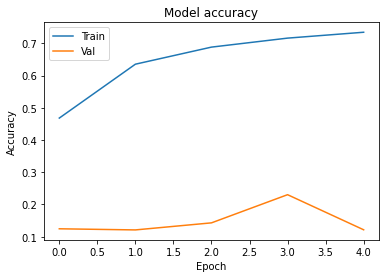

In [ ]:
plt.plot(data_history1.history['accuracy'])
plt.plot(data_history1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

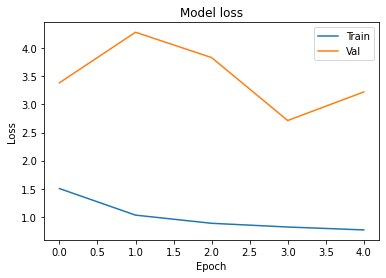

In [ ]:
plt.plot(data_history1.history['loss'])
plt.plot(data_history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# Model evaluation
scores3 = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores3[1]*100))

Accuracy: 12.15%


changing epochs to 6

In [ ]:
numpy.random.seed(seed)
data_history3 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=6, batch_size=16)


Epoch 1/6
3125/3125 [==============================] - 486s 155ms/step - loss: 0.9100 - accuracy: 0.6856 - val_loss: 3.3038 - val_accuracy: 0.1099
Epoch 2/6
3125/3125 [==============================] - 483s 154ms/step - loss: 0.8469 - accuracy: 0.7059 - val_loss: 3.4887 - val_accuracy: 0.1454
Epoch 3/6
3125/3125 [==============================] - 490s 157ms/step - loss: 0.8178 - accuracy: 0.7183 - val_loss: 3.4540 - val_accuracy: 0.1649
Epoch 4/6
3125/3125 [==============================] - 488s 156ms/step - loss: 0.7920 - accuracy: 0.7270 - val_loss: 2.9803 - val_accuracy: 0.1231
Epoch 5/6
3125/3125 [==============================] - 489s 157ms/step - loss: 0.7709 - accuracy: 0.7354 - val_loss: 2.9581 - val_accuracy: 0.1819
Epoch 6/6
3125/3125 [==============================] - 488s 156ms/step - loss: 0.7541 - accuracy: 0.7403 - val_loss: 3.7155 - val_accuracy: 0.1797


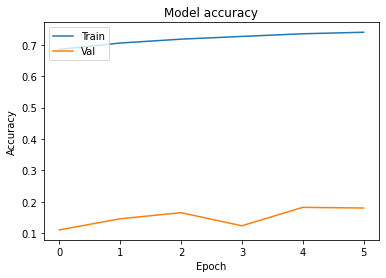

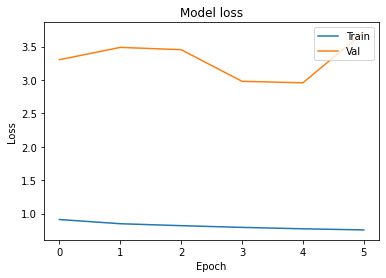

In [ ]:
plt.plot(data_history3.history['accuracy'])
plt.plot(data_history3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(data_history3.history['loss'])
plt.plot(data_history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# Model evaluation
scores4 = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores4[1]*100))

Accuracy: 17.97%


chaning optimizer using Adamax instead of Adam. Also, the learing rate is changed 
It is a variant of Adam based on the infinity norm. Default parameters follow those provided in the paper. Adamax is sometimes superior to adam, specially in models with embeddings.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adamax', metrics=['accuracy'])
numpy.random.seed(seed)
data_history6 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)



Epoch 1/5
782/782 [==============================] - 399s 508ms/step - loss: 0.4548 - accuracy: 0.8434 - val_loss: 3.1999 - val_accuracy: 0.1444
Epoch 2/5
782/782 [==============================] - 398s 509ms/step - loss: 0.3904 - accuracy: 0.8643 - val_loss: 3.3720 - val_accuracy: 0.1596
Epoch 3/5
782/782 [==============================] - 397s 508ms/step - loss: 0.3584 - accuracy: 0.8737 - val_loss: 3.2183 - val_accuracy: 0.1806
Epoch 4/5
782/782 [==============================] - 397s 508ms/step - loss: 0.3360 - accuracy: 0.8821 - val_loss: 3.0107 - val_accuracy: 0.1796
Epoch 5/5
782/782 [==============================] - 397s 507ms/step - loss: 0.3171 - accuracy: 0.8889 - val_loss: 3.1360 - val_accuracy: 0.1736


In [ ]:
numpy.random.seed(seed)
data_history6 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)
#numpy.random.seed(seed)
#data_history5 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 401s 511ms/step - loss: 0.7548 - val_loss: 2.7824
Epoch 2/5
782/782 [==============================] - 400s 512ms/step - loss: 0.6258 - val_loss: 3.6033
Epoch 3/5
782/782 [==============================] - 401s 512ms/step - loss: 0.6160 - val_loss: 3.8410
Epoch 4/5
782/782 [==============================] - 401s 512ms/step - loss: 0.5665 - val_loss: 3.5670
Epoch 5/5
782/782 [==============================] - 401s 513ms/step - loss: 0.5655 - val_loss: 2.9442


In [ ]:
history_dict = data_history6.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


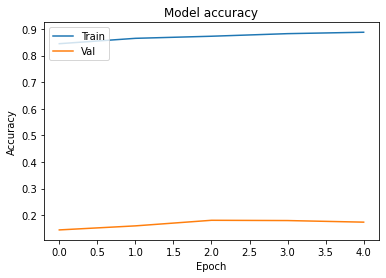

In [ ]:
plt.plot(data_history6.history['accuracy'])
plt.plot(data_history6.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


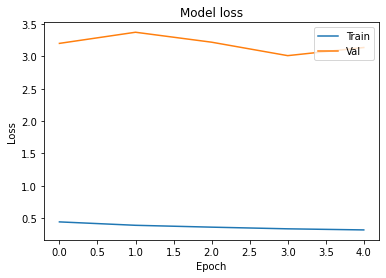

In [ ]:
plt.plot(data_history6.history['loss'])
plt.plot(data_history6.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# Model evaluation
scores5 = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores5[1]*100))

Accuracy: 17.36%


chaning dropout to 0.3

In [ ]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())



In [ ]:
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)       

In [ ]:
numpy.random.seed(seed)
data_history7 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 402s 512ms/step - loss: 0.6218 - accuracy: 0.8215 - val_loss: 2.7404 - val_accuracy: 0.1454
Epoch 2/5
782/782 [==============================] - 400s 512ms/step - loss: 0.4504 - accuracy: 0.8529 - val_loss: 2.7193 - val_accuracy: 0.1749
Epoch 3/5
782/782 [==============================] - 398s 508ms/step - loss: 0.4251 - accuracy: 0.8589 - val_loss: 3.4125 - val_accuracy: 0.1422
Epoch 4/5
782/782 [==============================] - 399s 510ms/step - loss: 0.4265 - accuracy: 0.8559 - val_loss: 3.1052 - val_accuracy: 0.1424
Epoch 5/5
782/782 [==============================] - 399s 511ms/step - loss: 0.4128 - accuracy: 0.8570 - val_loss: 3.0954 - val_accuracy: 0.1439


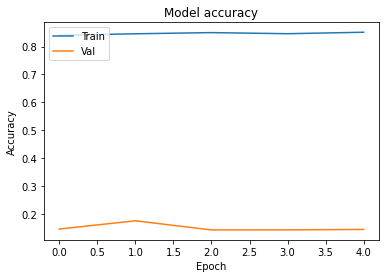

In [ ]:
plt.plot(data_history7.history['accuracy'])
plt.plot(data_history7.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

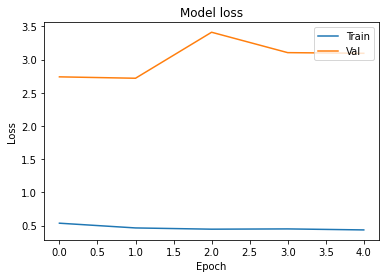

In [ ]:
plt.plot(data_history7.history['loss'])
plt.plot(data_history7.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# Model evaluation
scores6 = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores6[1]*100))

Accuracy: 14.39%


In [ ]:

model.save("cifar10_10epoch.h5") #save the model

In [ ]:

from keras.models import load_model
model = load_model("cifar10_10epoch.h5")#load the model